    Code from Teeter 2018

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import scipy.cluster.hierarchy as sch
import sklearn
from sklearn.cluster import AgglomerativeClustering 

Clustering the Parameters

In [15]:
main_name = "smnist-4-final"
parameters = np.loadtxt("results/results_wkof_080821/" + main_name + "-256units-0itr-allparams.csv", delimiter=',')
# parameters = np.loadtxt("results/results_wkof_080821/smnist-2-agn-256units-0itr-allparams.csv", delimiter=',')
print(parameters.shape)

# nrow, ncol = parameters.shape
# # Transform any parameters as needed
# for ii in range(ncol):
#   if (min(parameters[:,ii])*max(parameters[:,ii])>0):
#     if (min(parameters[:,ii])>0):
#       if (st.skew(parameters[:,ii])>st.skew(np.log10(parameters[:,ii]))):
#         print("positive and log")
#         parameters[:,ii]=np.log10(parameters[:,ii])
#     else:
#       if (st.skew(-parameters[:,ii])>st.skew(np.log10(-parameters[:,ii]))):
#         print("negative and log")
#         parameters[:,ii]=np.log10(-parameters[:,ii])

(256, 8)


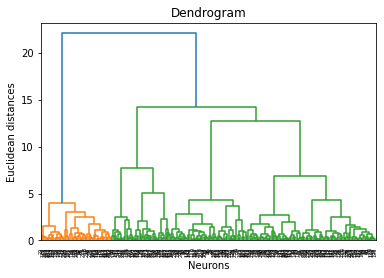

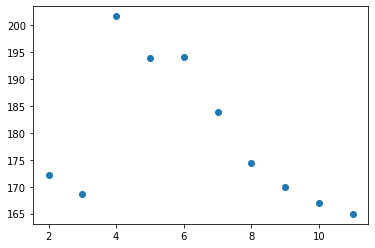

In [16]:
dendrogram = sch.dendrogram(sch.linkage(parameters, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Neurons')
plt.ylabel('Euclidean distances')
plt.show()

n_clusters_list = np.arange(2, 12, step=1)
ch_scores = []

for n_clusters in n_clusters_list:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
    y_hc=hc.fit_predict(parameters)
    ch_scores.append(sklearn.metrics.calinski_harabasz_score(parameters, y_hc))
plt.scatter(n_clusters_list, ch_scores)
results = np.zeros((len(ch_scores), 2))
results[:, 0] = n_clusters_list.reshape(-1)
results[:, 1] = ch_scores
np.savetxt("results/results_wkof_080821/" + main_name + "-256units-0itr-allparams-chscores.csv", results, delimiter=',')
# np.savetxt("results/results_wkof_080821/smnist-2-agn-256units-0itr-allparams-chscores.csv", y_hc, delimiter=',')

In [14]:
best_n_clusters = n_clusters_list[np.argmax(ch_scores)]
print(f"using n_clusters {best_n_clusters}")

hc = AgglomerativeClustering(n_clusters = best_n_clusters, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(parameters)
np.savetxt("results/results_wkof_080821/" + main_name + "-256units-0itr-allparams-clusters.csv", y_hc, delimiter=',')
# np.savetxt("results/results_wkof_080821/smnist-2-agn-256units-0itr-allparams-clusters.csv", y_hc, delimiter=',')

using n_clusters 5


Clustering the f-I curves

In [6]:
isyns = np.loadtxt("results/results_wkof_080821/smnist-4-agn-ficurve-isyns.csv", delimiter=',')
frates = np.loadtxt("results/results_wkof_080821/smnist-4-agn-ficurve-frates.csv", delimiter=',')
# isyns = np.loadtxt("results/results_wkof_080821/smnist-2-agn-isyns.csv", delimiter=',')
# frates = np.loadtxt("results/results_wkof_080821/pattern-4-frates.csv", delimiter=',')

num_neurons = frates.shape[1]

thresholds = np.empty(num_neurons)
scale_up = np.empty(num_neurons) # multiplicative factor by which frate is scaled after threshold
med_derivative = np.empty(num_neurons)

for i in range(num_neurons):
    threshold_found = False
    nan_found = False
    derivatives = []
    for j in range(len(isyns) - 1):
        if frates[j, i] >= 0.01 * max(frates[:, i]) and not threshold_found and not nan_found:
            thresholds[i] = isyns[j]
            scale_up[i] = isyns[j + 1] / isyns[j]
            threshold_found = True
        if not np.isnan(frates[j + 1, i]) and not np.isnan(frates[j, i]) and not nan_found:
            derivatives.append((frates[j + 1, i] - frates[j, i]) / (isyns[j + 1] - isyns[j]))
        else:
#             print(j)
            nan_found = True
    med_derivative[i] = np.median(derivatives)
    
            
# med_derivative = np.median(derivatives, 1)

features = np.zeros((num_neurons, 2))
features[:, 0] = thresholds
features[:, 1] = med_derivative
# features[:, 2] = scale_up
# print(thresholds)
np.savetxt("results/results_wkof_080821/smnist-4-agn-256units-256units-0itr-allfeatures.csv", features, delimiter=',')
# np.savetxt("results/results_wkof_080821/pattern-4-128units-0itr-allfeatures.csv", features, delimiter=',')

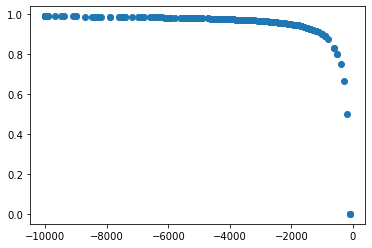

In [7]:
plt.scatter(thresholds, scale_up)

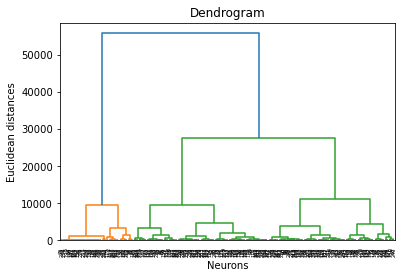

In [8]:
dendrogram = sch.dendrogram(sch.linkage(features, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Neurons')
plt.ylabel('Euclidean distances')
plt.show()

n_clusters_list = np.arange(2, 10, step = 1)
ch_scores = []
for n_clusters in n_clusters_list:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage ='ward')
    y_hc=hc.fit_predict(features)
    ch_scores.append(sklearn.metrics.calinski_harabasz_score(features, y_hc))
results =  np.zeros((len(n_clusters_list), 2))
results[:, 0] = n_clusters_list
results[:, 1] = ch_scores
# np.savetxt("results/results_wkof_080821/smnist-4-agn-256units-256units-0itr-allfeatures-chscores.csv", results, delimiter=',')

found best value at 9


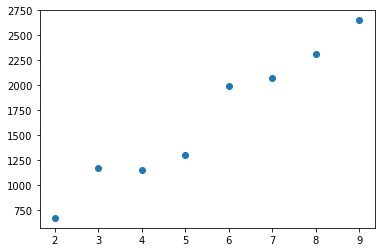

In [9]:
plt.scatter(n_clusters_list, ch_scores)
print(f"found best value at {n_clusters_list[np.argmax(ch_scores)]}")

In [10]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(features)
np.savetxt("results/results_wkof_080821/smnist-4-agn-256units-256units-0itr-allfeatures-clusters.csv", y_hc, delimiter=',')